In [56]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# fcm-E0.1

2022/10/20作成

fcm-eでは正則化パラメーターが10でも→+∞くらいの効果がある。  
0.1だと正則化が強すぎるので  
0.5から1くらいで調整する必要がありそう（lambdaと正則化の強さは反比例する。）

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み
iris = pd.read_csv("../../dataset/iris-dataset.csv")
df = iris.drop('species', axis=1)
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape

#クラスタ数宣言
c = 3
#Kはクラスタサイズ 
K = X_size /c
#交互最適化最大繰り返し数
max_iter = 100

#正則化パラメーター設定
lam = 0.1
lam_1= 1/lam

#ファジィパラメーター設定
m = 1

#初期値繰り返し回数
NumberOfRepetitions= 50

In [58]:
#uの最適化部分関数作成(fcm-e)
def u_optimize(d,c,lam):
    u = np.zeros((X_size,c))
    u_denominator = np.zeros((X_size,1))
    for i in range(X_size):
        #分母作成
        for j in range(c):
            u_denominator[i] += math.exp(-lam*d[i][j])
        #u[i]を計算
        for j in range(c):
            # if i <10:
            #     print(f"e**-lam*d_k{j}",math.exp(-lam*d[i][j]))
            u[i][j] = math.exp(-lam*d[i][j])/u_denominator[i]
        # print("i",i)
        # print("np.sumu[i]",np.sum(u[i]))
    return u

In [1]:
#hcm、fecbo-e用クラスタ中心計算部分関数作成
def v_calculation(u,c,dimension,X):
    #分母計算
    v_denominator = np.sum(u,axis=0)  
    #分子計算
    v_numerator = np.zeros((c,dimension))
    for j in range(c):
        for i in range(X_size):
            v_numerator[j]+= u[i][j]*X[i]
   
    v = np.zeros((c,dimension ))
    for i in range(c):
        v[i] = v_numerator[i]/v_denominator[i]
    return v

In [60]:
for s in range (NumberOfRepetitions):
    centroids = X[np.random.choice(X_size,c)]
    for epoch in range(max_iter):
        #print(f"{epoch+1}回目")
        #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
        d = np.zeros((X_size,c))
        for i in range(X_size):
            d[i] = np.sum((X[i]-centroids)**2,axis=1)
        #uの更新
        u = u_optimize(d,c,lam)
        #Jの計算
        #目的関数の計算
        J=0
        for i in range(X_size):
            for j in range(c):
                J += u[i][j]*d[i][j]+lam_1*u[i][j]*math.log(u[i][j])

        #vの更新
        new_centroids = v_calculation(u,c,dimension,X)

        # もしも重心が変わっていなかったら終了
        # if np.sum(np.abs(new_centroids-centroids))<=0.000001:
        if np.abs(new_centroids - centroids).max() <= 1e-7:
            #print(new_centroids-centroids)
            print("中心が変わらないのでbreakします！")
            break
        centroids = np.copy(new_centroids)

    #目的関数が小さくなっている時、cluster,best_J,best_centoridsの更新を行う
    if s == 0:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    elif best_J > J:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    print(f"{s+1}回目のクラスタリング結果↓")
    print(best_J)
    print(best_centroids)
    print("終了")
print(np_cluster)
print(best_J)
print(best_centroids)

中心が変わらないのでbreakします！
1回目のクラスタリング結果↓
-967.0940330021588
[[5.84333344 3.05399998 3.75866691 1.19866677]
 [5.84333312 3.05400005 3.75866616 1.19866646]
 [5.84333344 3.05399997 3.75866693 1.19866678]]
終了
中心が変わらないのでbreakします！
2回目のクラスタリング結果↓
-967.0940330021599
[[5.84333328 3.05400001 3.75866654 1.19866661]
 [5.84333353 3.05399996 3.75866713 1.19866686]
 [5.84333319 3.05400003 3.75866633 1.19866652]]
終了
中心が変わらないのでbreakします！
3回目のクラスタリング結果↓
-967.0940330021599
[[5.84333328 3.05400001 3.75866654 1.19866661]
 [5.84333353 3.05399996 3.75866713 1.19866686]
 [5.84333319 3.05400003 3.75866633 1.19866652]]
終了
中心が変わらないのでbreakします！
4回目のクラスタリング結果↓
-967.0940330021601
[[5.84333314 3.05400004 3.75866622 1.19866648]
 [5.84333344 3.05399998 3.75866692 1.19866677]
 [5.84333342 3.05399998 3.75866687 1.19866675]]
終了
中心が変わらないのでbreakします！
5回目のクラスタリング結果↓
-967.0940330021601
[[5.84333314 3.05400004 3.75866622 1.19866648]
 [5.84333344 3.05399998 3.75866692 1.19866677]
 [5.84333342 3.05399998 3.75866687 1.19866675]]
終了
中心が変わ

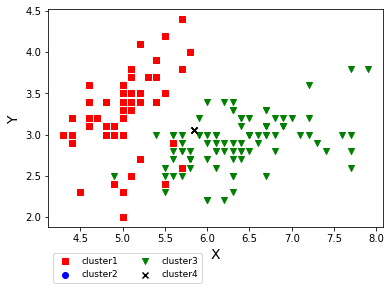

In [61]:
#matplotlibに描写

colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])
ax.scatter(best_centroids[:,0],best_centroids[:,1],color="black",marker="x")
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3','cluster4','cluster5',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left')  # 凡例を表示

plt.show()

In [62]:
print("クラスター個数",np.bincount(np_cluster))

クラスター個数 [59  0 91]


In [63]:
print(np.sum(best_u,axis=1))
print(np.sum(best_u,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[50. 50. 50.]


In [64]:
best_u

array([[0.33333345, 0.33333329, 0.33333326],
       [0.33333345, 0.33333329, 0.33333326],
       [0.33333345, 0.33333329, 0.33333326],
       [0.33333345, 0.33333329, 0.33333326],
       [0.33333345, 0.33333329, 0.33333326],
       [0.33333343, 0.3333333 , 0.33333327],
       [0.33333345, 0.33333329, 0.33333326],
       [0.33333344, 0.33333329, 0.33333326],
       [0.33333345, 0.33333329, 0.33333326],
       [0.33333344, 0.33333329, 0.33333326],
       [0.33333344, 0.33333329, 0.33333327],
       [0.33333344, 0.33333329, 0.33333327],
       [0.33333345, 0.33333329, 0.33333326],
       [0.33333347, 0.33333328, 0.33333325],
       [0.33333344, 0.33333329, 0.33333326],
       [0.33333343, 0.3333333 , 0.33333327],
       [0.33333344, 0.33333329, 0.33333326],
       [0.33333344, 0.33333329, 0.33333326],
       [0.33333343, 0.3333333 , 0.33333328],
       [0.33333344, 0.33333329, 0.33333327],
       [0.33333343, 0.3333333 , 0.33333327],
       [0.33333344, 0.33333329, 0.33333327],
       [0.

##　正解とのクラスター番号を合わせる作業セル

In [65]:
#正解リスト作成
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values
seikai

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
np_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

上記の二つのリストを比較してnp_clusterの番号を変更していく

In [67]:
# cluster_hensyuu = np_cluster
# cluster_hensyuu_0 = np.where(cluster_hensyuu==1, 0, cluster_hensyuu)
# cluster_hensyuu_0

In [68]:
#------正解率の算出
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values

seikaisuu = np.count_nonzero(np_cluster==seikai)
seikairitu= (np.count_nonzero(np_cluster==seikai))/X_size*100
print("正解率")
print(seikairitu)
print("正解数")
print(seikaisuu)
print("クラスタサイズ確認")
print(np.count_nonzero(np_cluster==0))
print(np.count_nonzero(np_cluster==1))
print(np.count_nonzero(np_cluster==2))

正解率
66.66666666666666
正解数
100
クラスタサイズ確認
59
0
91


In [69]:
#引数(クラスタ数(c),クラスター(cluster),データセット(X),クラスター中心(v)、\
#ファジィ化パラム(m)、帰属度(u))

def calc_F(c,cluster,X,v,m,u):
    #中心間距離の作成
    center_distance = np.zeros((c,c))
    for i in range(c):
        for j in range(c):
            center_distance[i][j]= np.sum((v[i]-v[j])**2)
    print("center_distance")
    print(center_distance)
    #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
    d_list=[]
    for i in range(X_size):
        for j in range(c):
            d_list.append(np.sum((X[i]-v[j])**2))
    d = np.array(d_list)
    d = d.reshape([X_size,c])
    print("d_{ki}")
    print(d[0])

    new_d = np.zeros((X_size,c))
    #ここが怪しい
    for i in range(c):
        new_d[cluster == i] = d[cluster == i]+center_distance[i]
    print("new_d{ki} = d_{ki}+d_{ii*}")
    print(new_d[0])

    #評価関数計算(ついでにJも再計算してあってるか確認)
    F = 0
    kakunin_J = 0
    u_m = u**m
    for i in range(X_size):
        F += np.sum(u[i] * new_d[i])
        kakunin_J += np.sum(u_m[i] * d[i])


    #この初期値のときの結果が優れている場合，bestを更新
    print("Jの値:",J)
    print("Jの値を再計算:",kakunin_J)
    print("Fの値:",F)
    return F

In [70]:
best_centroids

array([[5.84333314, 3.05400004, 3.75866622, 1.19866648],
       [5.8433334 , 3.05399998, 3.75866684, 1.19866674],
       [5.84333345, 3.05399997, 3.75866695, 1.19866678]])

In [71]:
F = calc_F(c,np_cluster,X,best_centroids,1,best_u)
F

center_distance
[[0.00000000e+00 5.22225018e-13 7.29843538e-13]
 [5.22225018e-13 0.00000000e+00 1.73336779e-14]
 [7.29843538e-13 1.73336779e-14 0.00000000e+00]]
d_{ki}
[7.31210118 7.31210506 7.31210576]
new_d{ki} = d_{ki}+d_{ii*}
[7.31210118 7.31210506 7.31210576]
Jの値: -967.0940330021589
Jの値を再計算: 680.8243999999787
Fの値: 680.824400000026


680.824400000026

In [72]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [73]:
#pandasで分割結果を記入
df["cluster"]= np_cluster
df["u1"]=best_u[:,0]
df["u2"]=best_u[:,1]
df["u3"]=best_u[:,2]
df["J"] = best_J
df["F"] = F
df.to_csv('Iris-fcm-E0.1.csv',index = False)

In [74]:
print(np.sum(best_u,axis=1))
print(np.sum(best_u,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[50. 50. 50.]
